In [3]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
%%matplotlib inline

print(tf.__version__)

2.0.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
train_labels.shape

(60000,)

In [20]:
np.unique(train_images)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [8]:
train_labels[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [9]:
test_labels.shape

(10000,)

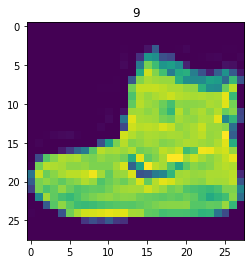

In [16]:
i = 0
plt.figure()
plt.imshow(train_images[i])
plt.title(train_labels[i])
plt.colorbar
plt.grid(False)
plt.show()

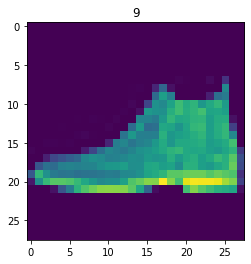

In [15]:
i = 1
plt.imshow(test_images[i])
plt.title(test_labels[i])
plt.show()

In [21]:
train_images = train_images / 255.0

test_images = test_images / 255.0

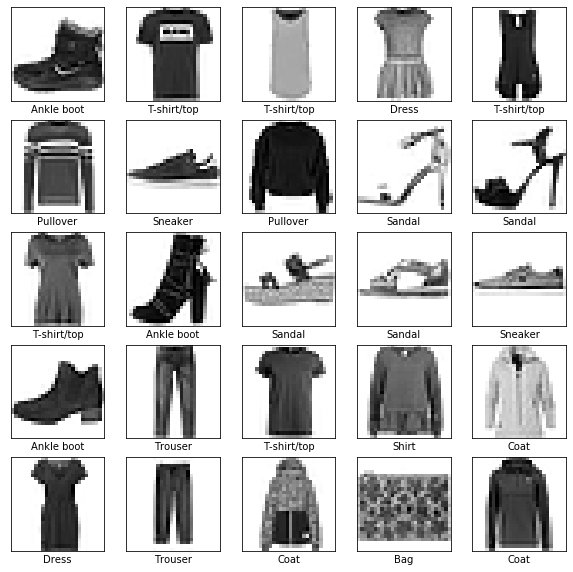

In [24]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [25]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.5007 - accuracy: 0.8250
Epoch 2/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3768 - accuracy: 0.8636
Epoch 3/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3364 - accuracy: 0.8772
Epoch 4/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3115 - accuracy: 0.8853
Epoch 5/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2945 - accuracy: 0.8914
Epoch 6/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2824 - accuracy: 0.8946
Epoch 7/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2686 - accuracy: 0.9005
Epoch 8/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2565 - accuracy: 0.9053
Epoch 9/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2495 - accuracy: 0.9071
Epoch 10/10
60

In [28]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 0s - loss: 0.2162 - accuracy: 0.8826

Test accuracy: 0.8826


In [29]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [30]:
predictions = probability_model.predict(test_images)

In [36]:
predictions[0]

array([1.2262380e-07, 8.1292448e-08, 7.5113562e-08, 3.8629324e-08,
       3.5171078e-07, 7.8861449e-05, 1.0470196e-06, 1.1158872e-02,
       1.3262512e-07, 9.8876047e-01], dtype=float32)

In [33]:
predictions[0].shape

(10,)

In [37]:
predictions[0].max()

0.9887605

In [34]:
np.argmax(predictions[0])

9

In [35]:
test_labels[0]

9

In [38]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [39]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

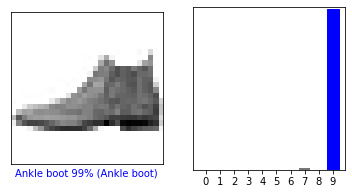

In [40]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

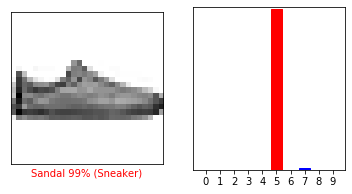

In [41]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

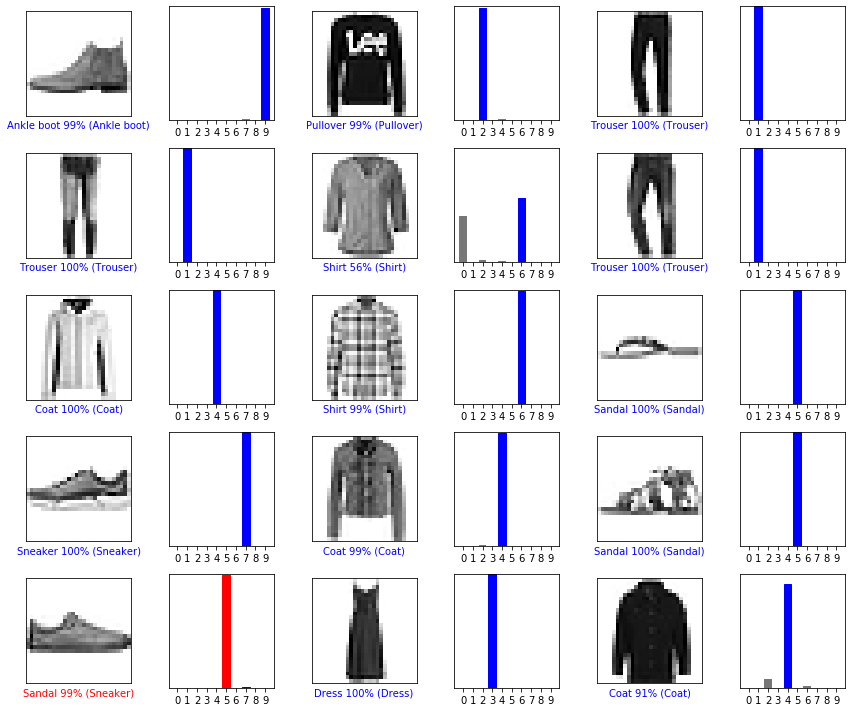

In [42]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [47]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [51]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

# 降维
# img = np.squeeze(img)
# img.shape

(1, 28, 28)


In [54]:
predictions_single = probability_model.predict(img)

In [55]:
print(predictions_single)

[[5.3808605e-04 3.0310405e-12 9.8586303e-01 4.8076356e-09 1.3078155e-02
  2.9119529e-14 5.2073272e-04 9.5773539e-16 5.1727907e-11 8.6497534e-14]]


In [58]:
predictions_single.shape

(1, 10)

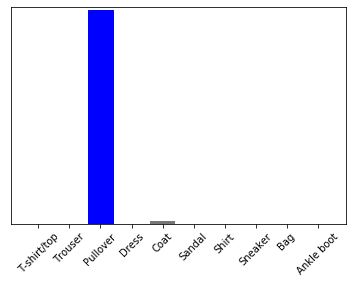

In [56]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [59]:
np.argmax(predictions_single[0])

2